In [154]:
from sklearn import datasets
import pandas as pd

In [155]:
dt = datasets.load_iris()

In [156]:
dir(dt)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [157]:
df = pd.DataFrame(dt.data,columns = dt.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [158]:
df = df.drop(['petal length (cm)','petal width (cm)'],axis =1)


In [159]:
df.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [160]:
from matplotlib import pyplot as plt

In [161]:
X

0      0.222222
1      0.166667
2      0.111111
3      0.083333
4      0.194444
         ...   
145    0.666667
146    0.555556
147    0.611111
148    0.527778
149    0.444444
Name: sepal length (cm), Length: 150, dtype: float64

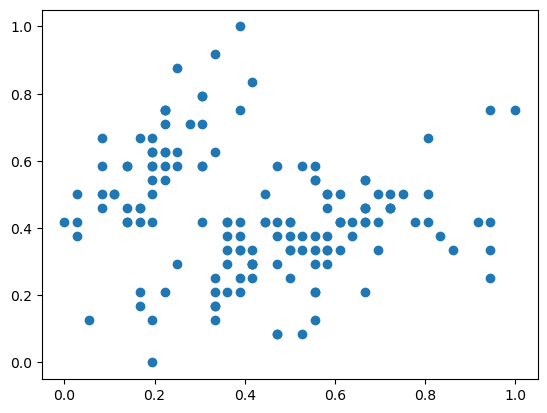

In [162]:
plt.scatter(X,y)

In [163]:
from sklearn.preprocessing import MinMaxScaler

In [164]:
scaler = MinMaxScaler()
scaler.fit(df[['sepal length (cm)']])
df['sepal length (cm)'] = scaler.transform(df[['sepal length (cm)']])
scaler.fit(df[['sepal width (cm)']])
df['sepal width (cm)'] = scaler.transform(df[['sepal width (cm)']])

In [165]:
df.head()

,sepal length (cm),sepal width (cm)
0,0.222222,0.625000
1,0.166667,0.416667
2,0.111111,0.500000
3,0.083333,0.458333
4,0.194444,0.666667


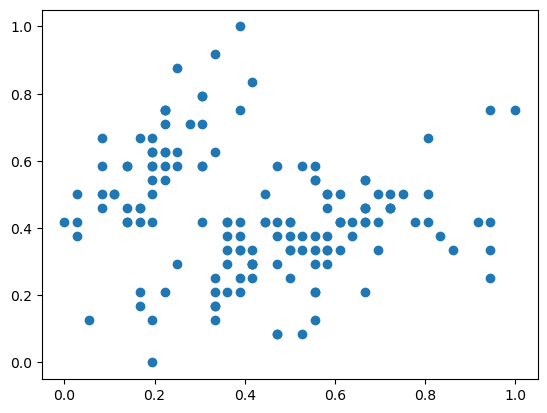

In [166]:
plt.scatter(df['sepal length (cm)'],df['sepal width (cm)'])

In [167]:
from sklearn.cluster import KMeans

In [168]:
X = df['sepal length (cm)']
y = df['sepal width (cm)']

In [169]:
km = KMeans(n_clusters = 3)
km
y_predicted = km.fit_predict(df[['sepal length (cm)','sepal width (cm)']])

C:\Users\Abhi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Abhi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [170]:
df['cluster'] = y_predicted
df.head()

,sepal length (cm),sepal width (cm),cluster
0,0.222222,0.625000,1
1,0.166667,0.416667,1
2,0.111111,0.500000,1
3,0.083333,0.458333,1
4,0.194444,0.666667,1


In [171]:
df1 = df[df['cluster'] == 0]
df2 = df[df['cluster'] == 1]
df3 = df[df['cluster'] == 2]


[[0.70478036 0.46705426]
 [0.19897959 0.60459184]
 [0.41810345 0.28232759]]


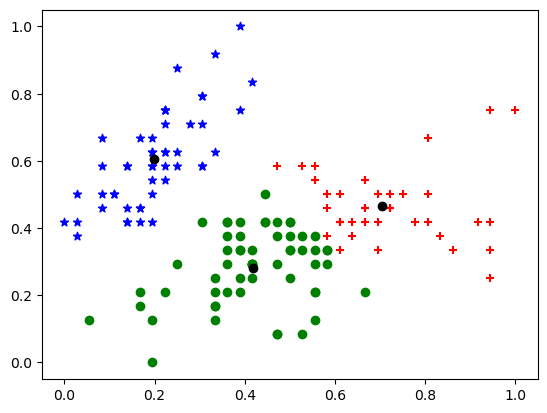

In [172]:
print(km.cluster_centers_)


plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color = 'red',marker = "+")
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color = 'blue',marker = "*")
plt.scatter(df3['sepal length (cm)'],df3['sepal width (cm)'],color = 'green')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color = 'black')

C:\Users\Abhi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Abhi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Abhi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Abhi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

[7.883359053497943, 2.385377607722209, 1.2159042946079985, 0.6371735517568852, 0.4295470809725194, 0.2827603235497972, 0.20440632089795477, 0.15197610637970108, 0.11577578704250242]


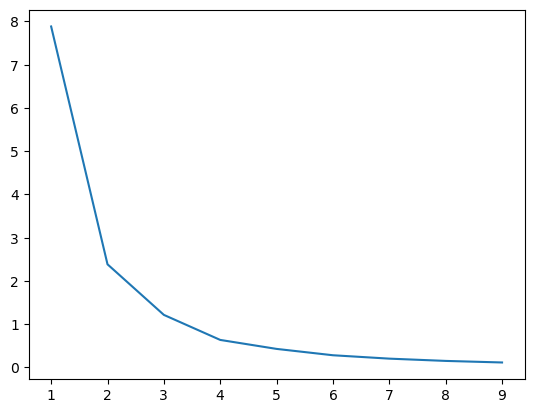

In [179]:
sse = []
k_range = range(1,10)
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit_predict(df[['sepal length (cm)']],df[['sepal width (cm)']])
    sse.append(km.inertia_)
    
    
    
print(sse)
plt.plot(k_range,sse)


Therefore k = 3 is the perfect value predicted using Elbow technique